# Tensorflow 2 - 모두의 딥러닝 코드 발제 1주차 -2 

## 1. 텐서플로 라이브러리를 설치 및 버젼 체크 후에 임포트 합니다.


In [0]:
!pip install tensorflow-gpu==2.0.0-rc1
try:
  # %tensorlow_version only exists in Colab.
  %tensorflow_version 2.x
except Execetion:
  pass
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd

In [0]:
print(tf.__version__)

2.0.0-rc1


## Lab 05 TensorFlow로 Logistic Classfication 구현하기

### Data 불러오기

In [0]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
#tensorflow2 에서는 placehold 안 만듬!

### 모델 생성

In [0]:
# keras의 다차원 계층 모델인 Sequential를 레이어를 만든다.
# 순차적으로 뉴런과 뉴런이 합쳐진 단위인 레이어를 일직선으로 배치한 것입니다.
model = tf.keras.models.Sequential()

# 입력이 1차원이고 출력이 1차원임을 뜻함 - Dense는 레이어의 종류
# Dense는 가장 기본적인 레이어로서, 레이어의 입력과 출력 사이에 잇는 모든 뉴런이 서로 연결되는 레이어이다.
# units는 레이어를 구성하는 뉴런의 수를 정의
# activiation : 활성화 함수 정해 주기(여기서는 sigmoid)
# input_shape을 통해 input 크기 정하기
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', input_shape = (2,)))

# Optimizer - Stochastic gradient descent - 확률적 경사 하강법
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# cost/loss funcion
# loss를 mean_squared_error 방식을 사용한다는 의미로 mse 라고 써도 인식한다.
model.compile(loss='mean_squared_error',optimizer=sgd)

#모델 정보 출력
model.summary()
#아래 그림이 모델을 표현한 것이다. Param #은 처음 입력 개수이다.(bias 포함)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


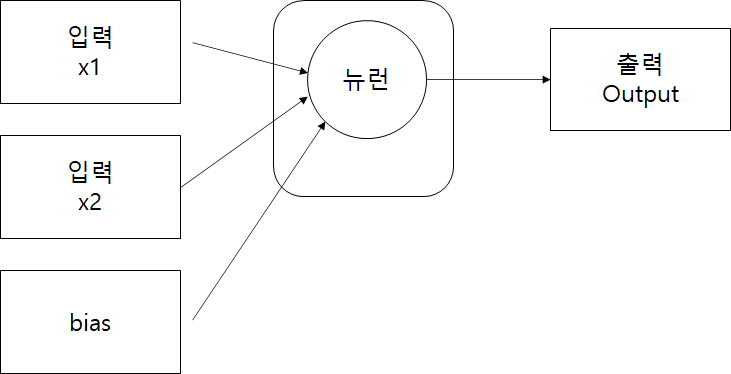
<br><br><br>

### 문제 풀이

문제 1. 아래 그림과 같이 나오도록 모델을 작성하세요!(activation은 모두 sigmoid 입니다!) <br><br>
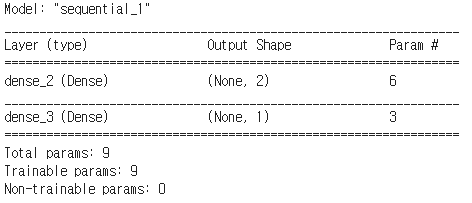

In [0]:
# 코드 작성 부분


### 모델 학습

In [0]:
#fit the line
# 텐서 플로우 1과 다르게 세션을 만들어서 돌릴 필요가 없다.
# 간단하게 만들어서 학습을 시작한다.
# epchs : 학습 횟수, batch_size : 한번에 학습시키는 데이터의 수
history = model.fit(x_data,y_data,epochs=500, batch_size =1)

Train on 6 samples
Epoch 1/2000
6/6 [==============================] - 0s 44ms/sample - loss: 0.2735
Epoch 2/2000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2689
Epoch 3/2000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2661
Epoch 4/2000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2601
Epoch 5/2000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2593
Epoch 6/2000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2557
Epoch 7/2000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2532
Epoch 8/2000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2487
Epoch 9/2000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2449
Epoch 10/2000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2419
Epoch 11/2000
6/6 [==============================] - 0s 4ms/sample - loss: 0.2374
Epoch 12/2000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2335
Epoch

### 모델 예측

In [0]:
# x 값이 [1,3]이면 예상값이 얼마인지 확인하는 부분
print(model.predict([[1, 3]]))

[[0.00095772]]


In [0]:
# 모델 가중치와 편향 출력
# kernel : 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치
# bias : 편향과 연결된 가중치
for weight in model.weights:
  print(weight)

<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 2.6534395, -1.0547107],
       [-1.872363 , -1.5762864]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([-1.5481054,  6.7295513], dtype=float32)>
<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 5.122782],
       [-8.815952]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-0.6554459], dtype=float32)>


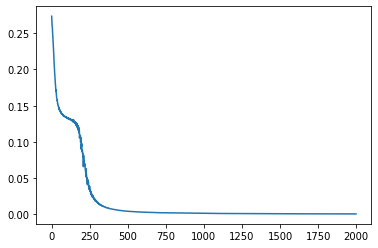

In [0]:
# 우리가 만든 model의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

## Lab 06-1 TensorFlow2로 Softmax Classification 구현하기

### Data 불러오기

In [0]:
# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np

x_raw = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_raw = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# np.array을 이용하여 배열 형태로 바꿔줌
x_data = np.array(x_raw, dtype=np.float32) 
y_data = np.array(y_raw, dtype=np.float32)

### 모델 생성

In [0]:
nb_classes = 3 #레이어 수

model = tf.keras.Sequential()
# input_dim : input 차원
model.add(tf.keras.layers.Dense(input_dim=4, units=nb_classes, use_bias=True))  # use_bias is True, by default

# softmax activations 사용: softmax = exp(logits) / reduce_sum(exp(logits), dim)
model.add(tf.keras.layers.Activation('softmax'))

# loss값은 categorical_crossentropy
# metrics에 accurancy가 추가되어 학습할 때 accurancy도 같이 나온다.
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 3)                 15        
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [0]:
history = model.fit(x_data, y_data, epochs=500)

Train on 8 samples
Epoch 1/500
8/8 [==============================] - 0s 37ms/sample - loss: 4.3559 - accuracy: 0.3750
Epoch 2/500
8/8 [==============================] - 0s 626us/sample - loss: 2.6434 - accuracy: 0.5000
Epoch 3/500
8/8 [==============================] - 0s 379us/sample - loss: 1.5816 - accuracy: 0.5000
Epoch 4/500
8/8 [==============================] - 0s 323us/sample - loss: 1.0458 - accuracy: 0.6250
Epoch 5/500
8/8 [==============================] - 0s 570us/sample - loss: 0.9820 - accuracy: 0.6250
Epoch 6/500
8/8 [==============================] - 0s 659us/sample - loss: 1.0519 - accuracy: 0.6250
Epoch 7/500
8/8 [==============================] - 0s 481us/sample - loss: 1.0719 - accuracy: 0.6250
Epoch 8/500
8/8 [==============================] - 0s 718us/sample - loss: 1.0500 - accuracy: 0.6250
Epoch 9/500
8/8 [==============================] - 0s 432us/sample - loss: 1.0018 - accuracy: 0.6250
Epoch 10/500
8/8 [==============================] - 0s 1ms/sample - loss:

### 모델 예측

In [0]:
print('--------------')
# Testing & One-hot encoding
a = model.predict(np.array([[1, 11, 7, 9]]))
print(a, tf.keras.backend.eval(tf.argmax(a, axis=1)))

print('--------------')
b = model.predict(np.array([[1, 3, 4, 3]]))
print(b, tf.keras.backend.eval(tf.argmax(b, axis=1)))

print('--------------')
# or use argmax embedded method, predict_classes
c = model.predict(np.array([[1, 1, 0, 1]]))
c_onehot = model.predict_classes(np.array([[1, 1, 0, 1]])) #이걸 이용하면 바로 클래스가 나옴
print(c, c_onehot)

print('--------------') #여러개 입력값도 가능!
all = model.predict(np.array([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]))
all_onehot = model.predict_classes(np.array([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]))
print(all, all_onehot)

--------------
[[7.5506963e-02 9.2427284e-01 2.2016712e-04]] [1]
--------------
[[0.39186713 0.5235578  0.08457507]] [1]
--------------
[[2.4466714e-04 1.9268261e-02 9.8048705e-01]] [2]
--------------
[[7.5507000e-02 9.2427284e-01 2.2016732e-04]
 [3.9186713e-01 5.2355778e-01 8.4575072e-02]
 [2.4466714e-04 1.9268261e-02 9.8048705e-01]] [1 1 2]


tf.keras.backend.eval 과 tf.argmax 부연 설명

In [0]:
print(a)
# 1이 나오지만 이상한 것도 같이 나온다.
print(tf.argmax(a, axis=1)) 
# type을 확인하니 class이다.
print(type(tf.argmax(a, axis=1))) 
# variable을 넣으면 Numpy array로 출력되게 하는 함수가 tf.keras.backend.eval 이다.
print(tf.keras.backend.eval(tf.argmax(a, axis=1))) 

[[7.5506963e-02 9.2427284e-01 2.2016712e-04]]
tf.Tensor([1], shape=(1,), dtype=int64)
<class 'tensorflow.python.framework.ops.EagerTensor'>
[1]


## Lab 06-2 TensorFlow로 Fancy Softmax Classification의 구현하기

### 데이터 불러오기

In [0]:
# Google Drive Mount

# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd gdrive/"My Drive"/'Colab Notebooks'

[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks'
/content/gdrive/My Drive/Colab Notebooks


In [0]:
# Predicting animal type based on various features
# 동물들의 특징을 통해 무슨 동물인지 예측하는 것이다! 0~6까지 범위를 예측한다.
xy = np.loadtxt('./data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

(101, 16) (101, 1)


텐서 1에서는 One-hot 과정을 reshape 과정도 거쳐야 하지만 텐서2 부터는 한 번만 거쳐도 된다!

In [0]:
nb_classes = 7  # 0 ~ 6
# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_data, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1.

### 모델 생성

In [0]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=nb_classes, input_dim=16, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
tf.model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 7)                 119       
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [0]:
history = tf.model.fit(x_data, y_one_hot, epochs=1000, )

Train on 101 samples
Epoch 1/1000
101/101 [==============================] - 0s 4ms/sample - loss: 1.8042 - accuracy: 0.2673
Epoch 2/1000
101/101 [==============================] - 0s 146us/sample - loss: 1.5412 - accuracy: 0.3960
Epoch 3/1000
101/101 [==============================] - 0s 126us/sample - loss: 1.3243 - accuracy: 0.4752
Epoch 4/1000
101/101 [==============================] - 0s 134us/sample - loss: 1.2113 - accuracy: 0.5941
Epoch 5/1000
101/101 [==============================] - 0s 180us/sample - loss: 1.1338 - accuracy: 0.6535
Epoch 6/1000
101/101 [==============================] - 0s 123us/sample - loss: 1.0101 - accuracy: 0.7426
Epoch 7/1000
101/101 [==============================] - 0s 124us/sample - loss: 0.9453 - accuracy: 0.8119
Epoch 8/1000
101/101 [==============================] - 0s 123us/sample - loss: 0.8805 - accuracy: 0.8020
Epoch 9/1000
101/101 [==============================] - 0s 115us/sample - loss: 0.8390 - accuracy: 0.8119
Epoch 10/1000
101/101 [====

### 모델 예측

In [0]:
# Single data test
test_data = np.array([[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]]) # expected prediction == 3 (feathers)
print(tf.model.predict(test_data), tf.model.predict_classes(test_data))

[[6.5805792e-04 1.0683892e-03 5.9232982e-03 9.8674345e-01 4.6410770e-03
  6.4484692e-07 9.6517650e-04]] [3]


In [0]:
# Full x_data test
pred = tf.model.predict_classes(x_data)


for p, y in zip(pred, y_data.flatten()):
  print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 5 True Y: 5
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 5 True Y: 5
[True] Prediction: 0 True Y: 0
[True] P

y_data_flatten()은 y을 하나로 쭉 펴주는 것이다! 나중에 CNN 모델에서 나온다!

In [0]:
print(y_data[0:10])
print(y_data.flatten())

[[0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]]
[0. 0. 3. 0. 0. 0. 0. 3. 3. 0. 0. 1. 3. 6. 6. 6. 1. 0. 3. 0. 1. 1. 0. 1.
 5. 4. 4. 0. 0. 0. 5. 0. 0. 1. 3. 0. 0. 1. 3. 5. 5. 1. 5. 1. 0. 0. 6. 0.
 0. 0. 0. 5. 4. 6. 0. 0. 1. 1. 1. 1. 3. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 6. 3. 0. 0. 2. 6. 1. 1. 2. 6. 3. 1. 0. 6. 3. 1. 5. 4. 2. 2. 3. 0. 0. 1.
 0. 5. 0. 6. 1.]


## 최종 정리

결과 값은 나오지 않으며 코드랑 설명만 보기, 결과값은 위에서 찾아서 보세요!

### 전처리 정리

In [0]:
# One-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y_data, nb_classes)

### 모델 생성 정리

In [0]:
# keras의 다차원 계층 모델인 Sequential를 레이어를 만든다.
# 순차적으로 뉴런과 뉴런이 합쳐진 단위인 레이어를 일직선으로 배치한 것입니다.
model = tf.keras.models.Sequential()

# 입력이 2차원이고 출력이 2차원임을 뜻함 - Dense는 레이어의 종류
# Dense는 가장 기본적인 레이어로서, 레이어의 입력과 출력 사이에 잇는 모든 뉴런이 서로 연결되는 레이어이다.
# units는 레이어를 구성하는 뉴런의 수를 정의
# activiation : 활성화 함수 정해 주기(sigmoid, Tanh, ReLU, Leaky ReLU, Identity Function, Max Out 등등)
# input_shape을 통해 input 크기 정하기(또는 input_dim을 통해서 차원 정함) -> 처음 레이어에서만 정의 해주면 된다.
# 마지막 레이어는 항상 우리가 원하는 아웃풋 개수로 맞춰줘야 한다. 예시는 아웃풋이 두개이다.
# 분류 문제는 마지막에 softmax을 쓰면 확률값으로 나와서 예측하는데 좋다.
model.add(tf.keras.layers.Dense(units = 3, activation = 'sigmoid', input_shape = (2,)))
model.add(tf.keras.layers.Dense(units = 2, activation = 'softmax'))

# Optimizer - Stochastic gradient descent - 확률적 경사 하강법
# lr을 잘 조정해보자.
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# cost/loss funcion
# loss를 mean_squared_error 방식을 사용한다는 의미로 mse 라고 써도 인식한다.
# optimizer은 최적화 방법이다.
# metrics을 통해서 학습과정에서 다양한 결과 값을 같이 나오게 할 수 있다.
model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy'])

#모델 정보 출력
model.summary()
#아래 그림이 모델을 표현한 것이다. Param #은 처음 입력 개수이다.(bias 포함)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 8         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


### 모델 학습 정리

In [0]:
# fit the line
# 텐서 플로우 1과 다르게 세션을 만들어서 돌릴 필요가 없다.
# 간단하게 만들어서 학습을 시작한다.
# epchs : 학습 횟수, batch_size : 한번에 학습시키는 데이터의 수
# validation_split : train, test 분리해서 validation 학습하는 것 지금은 test 0.25 train 0.75 비중으로 분리한 것이다.

# Callback 함수
# 콜백 함수는 모델을 학습할 때 에포크가 끝날 때마다 호출
# EarlyStopping은 학습을 일찍 멈추는 기능으로, patience는 몇번의 에포크를 기준으로 삼을지, monitor는 어떤 값을 지켜볼 것인지에 대한 인수
# 여기서는 val_loss 값이 3회의 에포크를 수행하는 동안 최고 기록을 갱신하지 못한다면 멈추게 된다.
history = model.fit(x_data,y_data,epochs=500, batch_size =1, validation_split=0.25
,callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss")])

### 모델 예측 정리

In [0]:
# 모델 가중치와 편향 출력
# kernel : 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치
# bias : 편향과 연결된 가중치
for weight in model.weights:
  print(weight)

In [0]:
# 우리가 만든 model의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [0]:
print('--------------')
# Testing & One-hot encoding
a = model.predict(np.array([[1, 11, 7, 9]]))
print(a, tf.keras.backend.eval(tf.argmax(a, axis=1)))

print('--------------')
b = model.predict(np.array([[1, 3, 4, 3]]))
print(b, tf.keras.backend.eval(tf.argmax(b, axis=1)))

print('--------------')
# or use argmax embedded method, predict_classes
c = model.predict(np.array([[1, 1, 0, 1]]))
c_onehot = model.predict_classes(np.array([[1, 1, 0, 1]])) #이걸 이용하면 바로 클래스가 나옴
print(c, c_onehot)

print('--------------') #여러개 입력값도 가능!
all = model.predict(np.array([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]))
all_onehot = model.predict_classes(np.array([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]))
print(all, all_onehot)

In [0]:
# 모델 평가 -> compile 과정에서 지정해준 matrix 값(accurancy 같은 것) 과 loss값이 출력됨.
model.evaluate(test_X, test_Y)

## 최종 문제 풀이

#### 사전 준비

**와인 예측 정확도를 높이는 모델을 자유롭게 설계 해보세요!** <br>
주의점 : 모델 전처리시 train, test 둘다 해야함!

**와인 데이터** <br>
와인의 품질을 예측하는 데이터이다.

**타겟 데이터** <br>
*   quality (score between 0 and 10) - > new quanlity(0, 1, 2)
*   우리는 new quanlity을 예측할 것이다.


**특징 데이터** <br>

*   fixed acidity
*   volatile acidity
*   citric acid
*   residual sugar
*   chlorides
*   free sulfur dioxide
*   total sulfur dioxide
*   density
*   pH
*   sulphates
*   alcohol

In [0]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()

In [0]:
# 와인 데이터셋 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

In [0]:
# 와인 데이터셋 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

In [0]:
# 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [0]:
# 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [0]:
# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

#### 문제 풀이

In [0]:
#코드 작성 부분
